In [1]:
#Paso 1 carga de las librerias necesarias

import numpy as np
import pandas as pd

# VISUALIZACION DE DATOS
import matplotlib.pyplot as plt
import seaborn as sns

# ESTADISTICAS
from statsmodels.graphics.gofplots import qqplot
# Esta funcion compara la distribucion de la muestra con una distribucion normal, 
# para comprobar si tu muestra se distribuye normalmente o no.

In [2]:
# Cargar los datos en un dataframe
Internet_TecyLocalidad = pd.read_csv(r'C:\Users\oomph\Documents\Henry Data Science\DTS09_Proyecto_Individual02\Proyecto-TelecomArg\AccesosaInternetfijoportecnologiaylocalidad_2791751681941036387.csv', sep = ',')
Internet_TecyLocalidad.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,873,4.704,- 0,2,- 0,975,- 0,664,7.218,NaN
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,- 0,- 0,- 0,10,1,- 0,- 0,192,NaN
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,- 0,- 0,- 0,- 0,- 0,- 0,- 0,181,181,NaN
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,- 0,782,- 0,6,167,- 0,- 0,327,1.282,NaN
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,- 0,- 0,- 0,- 0,- 0,- 0,- 0,6,6,NaN


In [17]:
Internet_TecyLocalidad.isnull().sum() # Revisar si hay valores faltantes

Provincia        0
Partido          0
Localidad        0
Link Indec       0
ADSL             0
CABLEMODEM       0
DIAL UP          0
FIBRA OPTICA     0
OTROS            0
SATELITAL        0
WIMAX            0
WIRELESS         0
Total general    0
dtype: int64

In [3]:
# Revisar calidad de los datos

Internet_TecyLocalidad.dtypes # Verificar los tipos de datos de cada columna



Provincia         object
Partido           object
Localidad         object
Link Indec        object
ADSL              object
CABLEMODEM        object
DIAL UP           object
FIBRA OPTICA      object
OTROS             object
SATELITAL         object
WIMAX             object
WIRELESS          object
Total general     object
Unnamed: 13      float64
dtype: object

In [4]:
# Eliminar la columna "Unnamed: 13"
Internet_TecyLocalidad = Internet_TecyLocalidad.drop(columns=["Unnamed: 13"])

# Resumen estadístico de las variables
Internet_TecyLocalidad.describe()


,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
count,3142,3142,3142,3142,3142,3142,3142,3142,3142,3142,3142,3142,3142
unique,24,432,2850,2718,724,693,86,706,219,24,12,606,1348
top,BUENOS AIRES,General Roca,OTROS,Sin Datos,- 0,- 0,- 0,- 0,- 0,- 0,- 0,- 0,1
freq,716,57,69,72,2016,2295,2760,1743,2537,2089,3131,934,193


C:\Users\oomph\AppData\Local\Temp\ipykernel_8092\2707855778.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_int_tec_loc = Internet_TecyLocalidad.corr()


<AxesSubplot: >

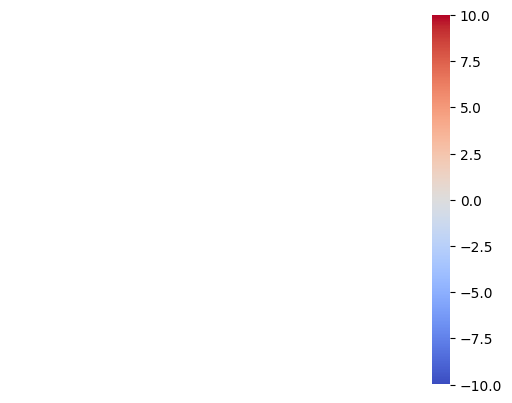

In [20]:
# Matriz de correlación - Internet Tec y Localidad
corr_int_tec_loc = Internet_TecyLocalidad.corr()
sns.heatmap(corr_int_tec_loc, annot=True, cmap="coolwarm", vmin=-10, vmax=10) # Mapa de calor


<AxesSubplot: xlabel='ADSL', ylabel='Count'>

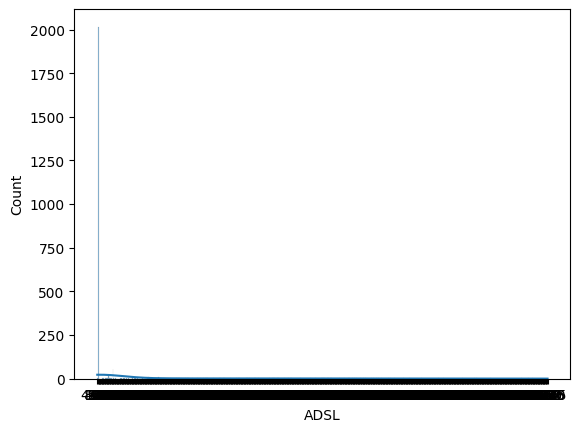

In [6]:

# Visualización de la distribución
sns.histplot(Internet_TecyLocalidad["ADSL"], kde=True, bins=10) # Histograma para la tecnología ADSL




<AxesSubplot: xlabel='CABLEMODEM', ylabel='Count'>

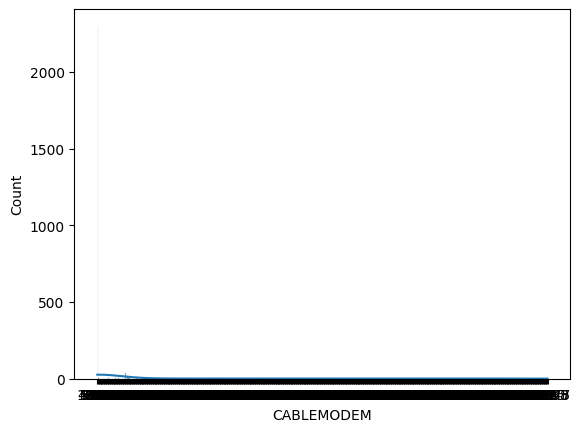

In [7]:
sns.histplot(Internet_TecyLocalidad["CABLEMODEM"], kde=True, bins=10) # Histograma para la tecnología CABLEMODEM


In [ ]:
sns.histplot(Internet_TecyLocalidad["DIAL UP"], kde=True, bins=10) # Histograma para la tecnología DIAL UP


In [ ]:
sns.histplot(Internet_TecyLocalidad["FIBRA OPTICA"], kde=True, bins=10) # Histograma para la tecnología FIBRA OPTICA


In [ ]:
sns.histplot(Internet_TecyLocalidad["OTROS"], kde=True, bins=10) # Histograma para la tecnología OTROS


In [ ]:
sns.histplot(Internet_TecyLocalidad["SATELITAL"], kde=True, bins=10) # Histograma para la tecnología SATELITAL


In [ ]:
sns.histplot(Internet_TecyLocalidad["WIMAX"], kde=True, bins=10) # Histograma para la tecnología WIMAX


In [ ]:
sns.histplot(Internet_TecyLocalidad["WIRELESS"], kde=True, bins=10) # Histograma para la tecnología WIRELESS

In [9]:
# Agrupación y análisis de tendencias
tecnologias = ["ADSL", "CABLEMODEM", "DIAL UP", "FIBRA OPTICA", "OTROS", "SATELITAL", "WIMAX", "WIRELESS"]
Internet_TecyLocalidad.groupby("Provincia")[tecnologias].mean() # Calcular el promedio por provincia


C:\Users\oomph\AppData\Local\Temp\ipykernel_8092\1678811423.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Internet_TecyLocalidad.groupby("Provincia")[tecnologias].mean() # Calcular el promedio por provincia


""
Provincia
BUENOS AIRES
CABA
CATAMARCA
CHACO
CHUBUT
CORDOBA
CORRIENTES
ENTRE RIOS
FORMOSA


In [10]:
Internet_TecyLocalidad.groupby("Partido")[tecnologias].mean() # Calcular el promedio por partido


C:\Users\oomph\AppData\Local\Temp\ipykernel_8092\1588292074.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Internet_TecyLocalidad.groupby("Partido")[tecnologias].mean() # Calcular el promedio por partido


""
Partido
12 de Octubre
1º de Mayo
2 de Abril
25 de Mayo
9 de Julio
...
Zapala
Zonda
Zárate


In [11]:
Internet_TecyLocalidad.groupby("Localidad")[tecnologias].mean() # Calcular el promedio por localidad


C:\Users\oomph\AppData\Local\Temp\ipykernel_8092\1527351423.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Internet_TecyLocalidad.groupby("Localidad")[tecnologias].mean() # Calcular el promedio por localidad


""
Localidad
11 De Septiembre
11 de Octubre
12 de Octubre
1º de Mayo
20 De Junio
...
ruta del sol
Álvarez
Árraga


<AxesSubplot: xlabel='FIBRA OPTICA', ylabel='CABLEMODEM'>

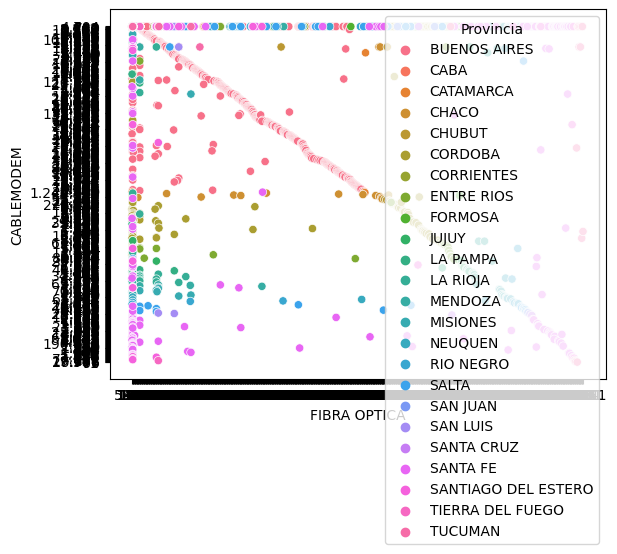

In [12]:

# Análisis exploratorio bivariado
sns.scatterplot(data=Internet_TecyLocalidad, x="FIBRA OPTICA", y="CABLEMODEM", hue="Provincia") # Scatter plot para comparar FIBRA OPTICA y CABLEMODEM por provincia


<AxesSubplot: xlabel='WIMAX', ylabel='WIRELESS'>

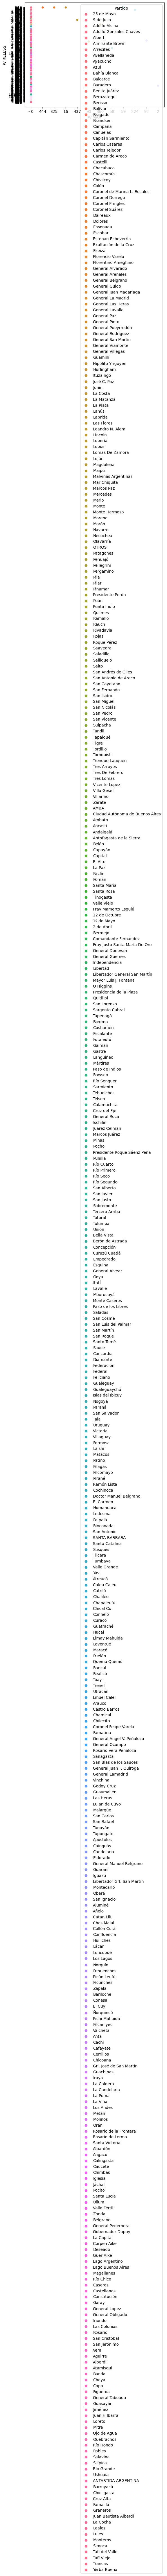

In [13]:
sns.scatterplot(data=Internet_TecyLocalidad, x="WIMAX", y="WIRELESS", hue="Partido") # Scatter plot para comparar WIMAX y WIRELESS por partido


In [18]:
Internet_TecyLocalidad.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,873,4.704,- 0,2,- 0,975,- 0,664,7.218
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,- 0,- 0,- 0,10,1,- 0,- 0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,- 0,- 0,- 0,- 0,- 0,- 0,- 0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,- 0,782,- 0,6,167,- 0,- 0,327,1.282
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,- 0,- 0,- 0,- 0,- 0,- 0,- 0,6,6


In [16]:
# Definir lista de columnas que contienen información sobre las diferentes tecnologías de acceso a Internet
tecnologias = ["ADSL", "CABLEMODEM", "DIAL UP", "FIBRA OPTICA", "OTROS", "SATELITAL", "WIMAX", "WIRELESS"]

# Detección de outliers
sns.boxplot(data=Internet_TecyLocalidad[tecnologias]) # Verificar si hay outliers

ValueError: min() arg is an empty sequence